In [6]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
pd.set_option('display.max_columns', 30)
data = pd.read_csv('../../data/train.csv', dtype = types)

map_df = gpd.read_file('../../data/mexico_map/mexstates.shp')

data.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,False,False,False,False,False,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301889,-99.688019,2012-03-09 00:00:00,False,False,False,True,True,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,False,False,False,False,False,1150000


In [7]:
geo_df = pd.DataFrame()
geo_df['provincia'] = data['provincia']
geo_df['count'] = 1
geo_count = geo_df.groupby('provincia').agg({'count':'sum'})
geo_count.reset_index(inplace = True)
geo_count

,provincia,count
0,Aguascalientes,1753
1,Baja California Norte,3220
2,Baja California Sur,1700
3,Campeche,263
4,Chiapas,1126
5,Chihuahua,4590
6,Coahuila,3695
7,Colima,1008
8,Distrito Federal,58790
9,Durango,2275


In [8]:
provincias_dict = {'Aguascalientes':'Aguascalientes', 'Baja California Norte':'Baja California',
             'Baja California Sur':'Baja California Sur', 'Campeche':'Campeche', 'Chiapas':'Chiapas',
             'Chihuahua':'Chihuahua', 'Coahuila':'Coahuila', 'Colima':'Colima', 'Distrito Federal':'Distrito Federal',
             'Durango':'Durango', 'Edo. de México':'Mexico', 'Guanajuato':'Guanajuato', 'Guerrero': 'Guerrero',
             'Hidalgo':'Hidalgo', 'Jalisco':'Jalisco', 'Michoacán':'Michoacan', 'Morelos':'Morelos',
             'Nayarit':'Nayarit', 'Nuevo León':'Nuevo Leon', 'Oaxaca':'Oaxaca', 'Puebla':'Puebla',
             'Querétaro':'Queretaro', 'Quintana Roo':'Quintana Roo', 'San luis Potosí':'San Luis Potosi',
             'Sinaloa':'Sinaloa', 'Sonora':'Sonora', 'Tabasco':'Tabasco','Tamaulipas':'Tamaulipas',
             'Tlaxcala':'Tlaxcala', 'Veracruz':'Veracruz', 'Yucatán':'Yucatan','Zacatecas':'Zacatecas'}

In [9]:
def gringofy(x):
    return provincias_dict[x]
    
ad = geo_count.rename(columns={'provincia':'ADMIN_NAME'})
ad['ADMIN_NAME'] = ad['ADMIN_NAME'].apply(gringofy)

ad.dtypes

ADMIN_NAME    object
count          int64
dtype: object

In [14]:
merged = map_df.merge(ad, on='ADMIN_NAME')
merged['count'] = np.log(merged['count'])
merged.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,count
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",8.431635
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",8.214736
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,9.637176
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",7.741968
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,7.498870


(-119.98744468643297,
 -85.1553394321589,
 13.642151165294234,
 33.626851749858545)

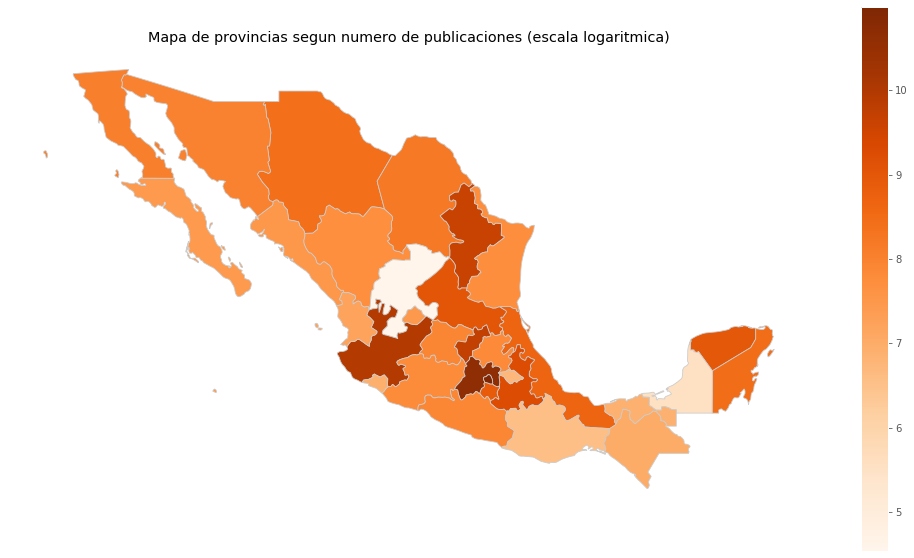

In [17]:
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(18, 10))

merged.plot(column='count', cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
ax.set_title('Mapa de provincias segun numero de publicaciones (escala logaritmica)')
ax.axis('off')